In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import seaborn as sns
import tensorflow as tf
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from keras.layers import LSTM
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report


In [132]:
## Read in the data 
data_1 = pd.read_csv("1_raw_data_13-12_22.03.16.txt" , sep = "\t")
data_2 = pd.read_csv("2_raw_data_13-13_22.03.16.txt" , sep = "\t")

In [133]:
data_1.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0


In [134]:
data_2.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,2,-0.00001,-0.00004,-0.00002,-0.00002,-0.00001,-0.00001,0.00001,-0.00003,0
1,6,-0.00001,-0.00004,-0.00002,-0.00002,-0.00001,-0.00001,0.00001,-0.00003,0
2,7,-0.00001,-0.00004,-0.00002,-0.00002,-0.00001,-0.00001,0.00001,-0.00003,0
3,8,-0.00003,-0.00005,-0.00008,-0.00004,-0.00003,0.00000,-0.00002,0.00000,0
4,9,-0.00003,-0.00001,0.00000,0.00001,-0.00001,0.00000,0.00000,-0.00002,0


In [135]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63196 entries, 0 to 63195
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      63196 non-null  int64  
 1   channel1  63196 non-null  float64
 2   channel2  63196 non-null  float64
 3   channel3  63196 non-null  float64
 4   channel4  63196 non-null  float64
 5   channel5  63196 non-null  float64
 6   channel6  63196 non-null  float64
 7   channel7  63196 non-null  float64
 8   channel8  63196 non-null  float64
 9   class     63196 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 4.8 MB


In [136]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57974 entries, 0 to 57973
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      57974 non-null  int64  
 1   channel1  57974 non-null  float64
 2   channel2  57974 non-null  float64
 3   channel3  57974 non-null  float64
 4   channel4  57974 non-null  float64
 5   channel5  57974 non-null  float64
 6   channel6  57974 non-null  float64
 7   channel7  57974 non-null  float64
 8   channel8  57974 non-null  float64
 9   class     57974 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 4.4 MB


In [137]:
data_1['class'].value_counts()

0    41272
3     3816
1     3780
6     3747
5     3615
2     3525
4     3441
Name: class, dtype: int64

In [138]:
data_2['class'].value_counts()

0    37410
1     3531
3     3513
5     3460
6     3396
4     3383
2     3281
Name: class, dtype: int64

In [139]:
37410/data_2.shape[0]

0.6452892676027184

In [140]:
data_1.isnull().sum()

time        0
channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       0
dtype: int64

In [141]:
## Merge the two files. 
total_data_1 = pd.concat([data_1, data_2])

In [142]:
print(total_data_1.head())

print("\ntotal no of records in the file {}:".format(total_data_1.shape[0]))


   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  
0  -0.00001      0  
1  -0.00001      0  
2   0.00001      0  
3   0.00001      0  
4   0.00001      0  

total no of records in the file 121170:


In [143]:
total_data_1['class'].value_counts()

0    78682
3     7329
1     7311
6     7143
5     7075
4     6824
2     6806
Name: class, dtype: int64

In [144]:
78682/ total_data_1.shape[0]

0.6493521498720806

In [145]:
## Drop the labels that are not marked .

total_data = total_data_1[total_data_1['class'] != 0]
total_data.shape

(42488, 10)

### Feature Scaling

In [146]:
## Use 'train_test_split' function to split data  into train and test 

target = total_data['class']
predictors = total_data.drop(['time','class'], axis = 1)

x_train,x_test,y_train,y_test = train_test_split(predictors, target, random_state = 1,test_size = 0.2,stratify = target)

print("X_train :" + str(x_train.shape))
print("X_train index nos:" + str(x_train.index))
print("X_test :" + str(x_test.shape))
print("y_train :" + str(y_train.shape))
print("y_test :" + str(y_test.shape))
   

X_train :(33990, 8)
X_train index nos:Int64Index([34002, 18341, 34582,  6648, 18862, 13638, 16719, 16247, 13219,
            14338,
            ...
             5895, 43085, 34833, 18988, 16100, 55987, 25874, 61395, 34265,
            55290],
           dtype='int64', length=33990)
X_test :(8498, 8)
y_train :(33990,)
y_test :(8498,)


In [147]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [148]:
evalset = [(x_train, y_train), (x_test,y_test)]

In [149]:
# Mean Squared Error (MSE)
def mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

# Root Mean Squared Error (RMSE)
def rmse(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    return rmse

# Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def mape(y_true, y_pred):
    non_zero_indices = y_true != 0  # Exclude zero values
    mape = np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100
    return mape

### Random Forest Classifier

In [150]:
model_RF = RandomForestClassifier(n_estimators = 100, random_state=1)

In [151]:
model_RF.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [152]:
y_pred = model_RF.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy for RF: %.2f%%" % (accuracy_rf * 100.00))

Accuracy for RF: 98.61%


In [153]:
y_true = np.array(y_test)

In [154]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [155]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [156]:
results = pd.DataFrame(pd.DataFrame([['Random Forest', acc, f1, prec, rec,mse_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [157]:
results

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,Random Forest,0.986114,0.986058,0.98608,0.986058,0.092728,0.304512,0.032478,1.992136


In [158]:
cm_rf = confusion_matrix(y_true, y_pred)

In [159]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1462
           1       0.99      0.98      0.99      1361
           2       0.98      0.98      0.98      1466
           3       0.98      0.99      0.98      1365
           4       0.99      0.98      0.98      1415
           5       0.98      0.98      0.98      1429

    accuracy                           0.99      8498
   macro avg       0.99      0.99      0.99      8498
weighted avg       0.99      0.99      0.99      8498



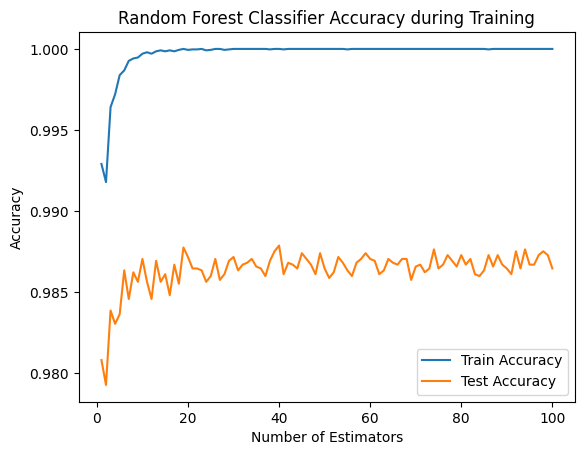

In [160]:
# Plot the accuracy graph
n_estimators = range(1, 101)  # Number of estimators to plot
train_accuracy = []
test_accuracy = []

for n in n_estimators:
    model_rf = RandomForestClassifier(n_estimators=n)
    model_rf.fit(x_train, y_train)
    y_train_pred = model_rf.predict(x_train)
    y_test_pred = model_rf.predict(x_test)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

plt.plot(n_estimators, train_accuracy, label='Train Accuracy')
plt.plot(n_estimators, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy during Training')
plt.legend()
plt.show()

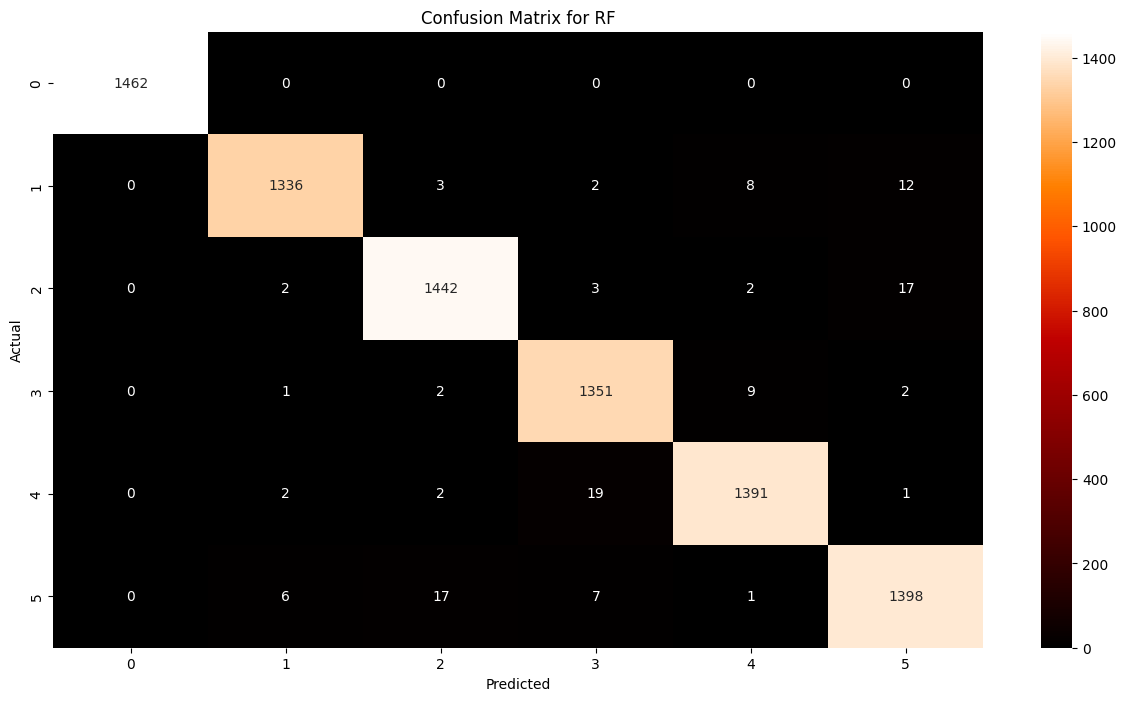

In [161]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RF")
plt.show()

### KNN Classifier

In [162]:
# Create the KNN classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

In [163]:
# Fit the classifier to the training data
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [164]:
# Predict the labels of the test data
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy for KNN: %.2f%%" % (accuracy_knn * 100.00))

Accuracy for KNN: 97.68%


In [165]:
y_true = np.array(y_test)

In [166]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [167]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [168]:
results_knn = pd.DataFrame(pd.DataFrame([['KNN Classifier', acc, f1, prec, rec,mae_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [169]:
results_knn

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,KNN Classifier,0.976818,0.9767,0.976866,0.976636,0.050953,0.375309,0.050953,3.305856


In [170]:
results= results= pd.concat([results, results_knn], ignore_index= True)

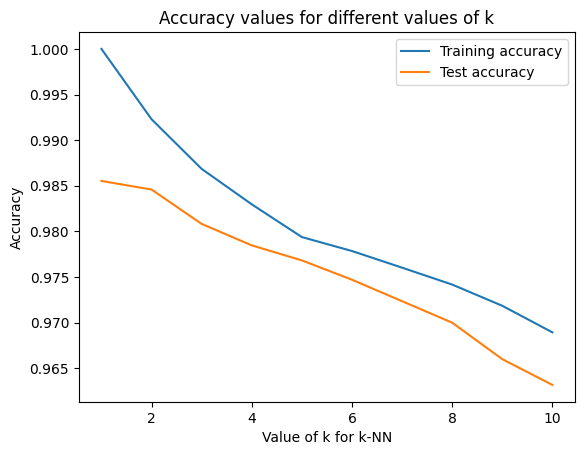

In [171]:
# Vary k from 1 to 10
k_values = range(1, 11)

# Calculate accuracy for each k on training and test sets
train_accuracies = []
test_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Calculate accuracy on training data
    y_train_pred = knn.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Calculate accuracy on test data
    y_test_pred = knn.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot the accuracy values for each k on training and test sets
plt.plot(k_values, train_accuracies, label='Training accuracy')
plt.plot(k_values, test_accuracies, label='Test accuracy')
plt.xlabel('Value of k for k-NN')
plt.ylabel('Accuracy')
plt.title('Accuracy values for different values of k')
plt.legend()
plt.show()

In [172]:
cm_knn  = confusion_matrix(y_true,y_pred)

In [173]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1462
           1       0.99      0.96      0.98      1361
           2       0.97      0.97      0.97      1466
           3       0.96      0.98      0.97      1365
           4       0.98      0.98      0.98      1415
           5       0.97      0.97      0.97      1429

    accuracy                           0.98      8498
   macro avg       0.98      0.98      0.98      8498
weighted avg       0.98      0.98      0.98      8498



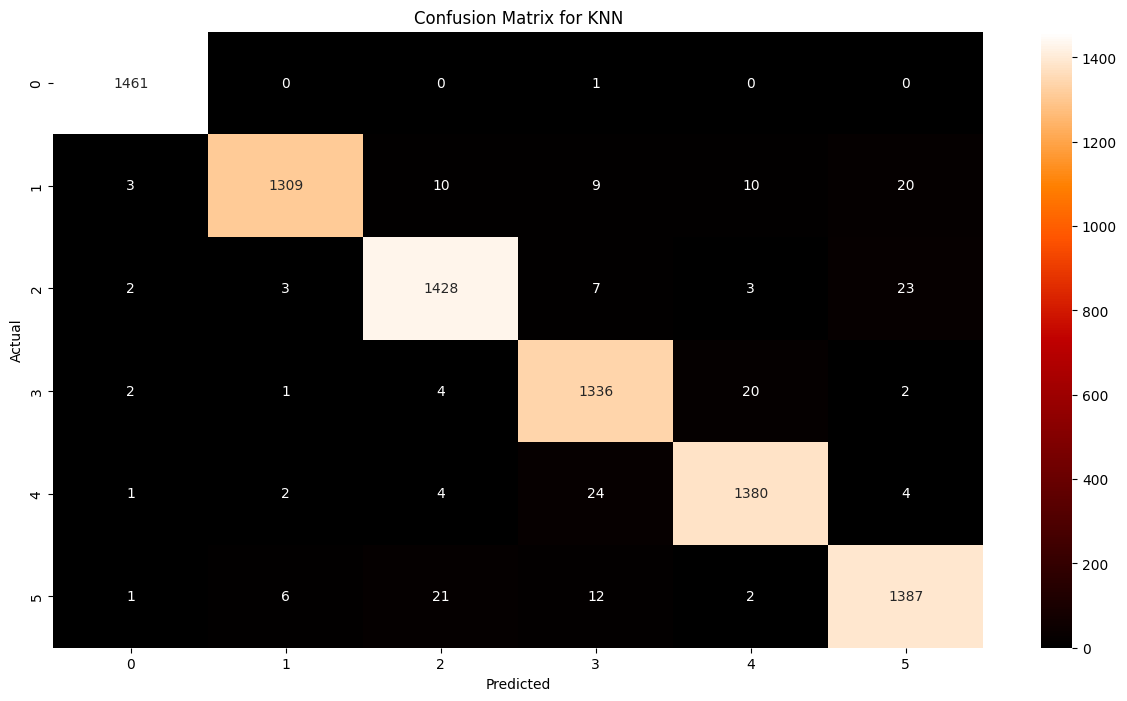

In [174]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN")
plt.show()

### XGB Classifier

In [175]:
model_XGB = xgb.XGBClassifier()

In [176]:
model_XGB.fit(x_train, y_train, eval_metric='merror', eval_set=evalset, verbose=False)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [177]:
y_pred = model_XGB.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy for XGB: %.2f%%" % (accuracy_xgb * 100.00))

Accuracy for XGB: 98.69%


In [178]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [179]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [180]:
result_xgb = pd.DataFrame(pd.DataFrame([['XGB Classifier', acc, f1, prec, rec, mse_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [181]:
result_xgb

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,XGB Classifier,0.986938,0.986871,0.986897,0.98687,0.087197,0.295291,0.030242,1.969632


In [182]:
results= pd.concat([results, result_xgb], ignore_index= True)

In [183]:
accuracy_results = model_XGB.evals_result()
train_accuracy = accuracy_results['validation_0']['merror']
test_accuracy = accuracy_results['validation_1']['merror']

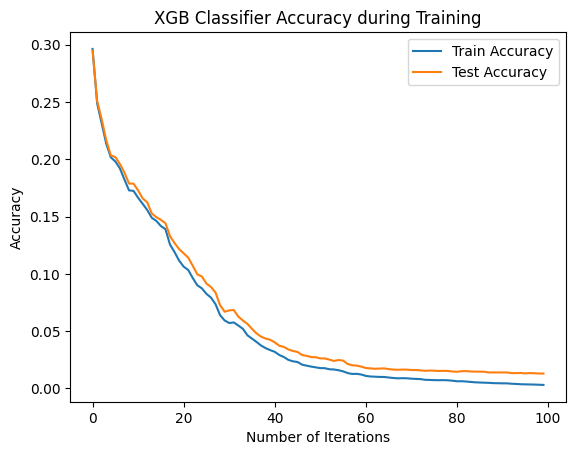

In [184]:
# Plot the accuracy graph
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('XGB Classifier Accuracy during Training')
plt.legend()
plt.show()

In [185]:
cm_xgb = confusion_matrix(y_true, y_pred)

In [186]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1462
           1       0.99      0.98      0.99      1361
           2       0.99      0.98      0.99      1466
           3       0.98      0.99      0.98      1365
           4       0.99      0.99      0.99      1415
           5       0.98      0.98      0.98      1429

    accuracy                           0.99      8498
   macro avg       0.99      0.99      0.99      8498
weighted avg       0.99      0.99      0.99      8498



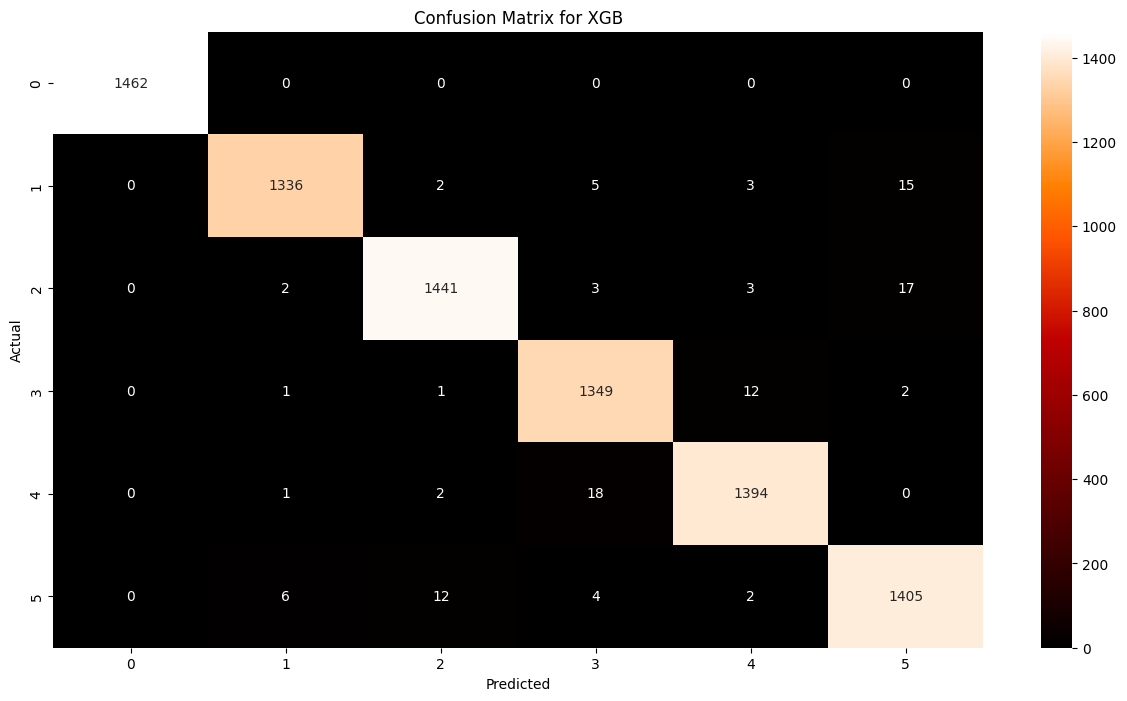

In [187]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGB")
plt.show()

### GNB CLassifier

In [188]:
model_GNB = GaussianNB()

In [189]:
model_GNB.fit(x_train, y_train)

GaussianNB()

In [190]:
y_pred = model_GNB.predict(x_test)
accuracy_gnb = accuracy_score(y_test, y_pred)
print("Accuracy for GNB: %.2f%%" % (accuracy_gnb * 100.00))

Accuracy for GNB: 62.77%


In [191]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='micro')
prec = precision_score(y_test,y_pred,average='micro')
rec = recall_score(y_test,y_pred,average='micro')

In [192]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [193]:
results_gnb = pd.DataFrame(pd.DataFrame([['GNB Classifier', acc, f1, prec, rec, mse_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [194]:
results_gnb

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,GNB Classifier,0.627677,0.627677,0.627677,0.627677,2.194046,1.481231,0.811367,46.431448


In [195]:
results= pd.concat([results, results_gnb], ignore_index= True)

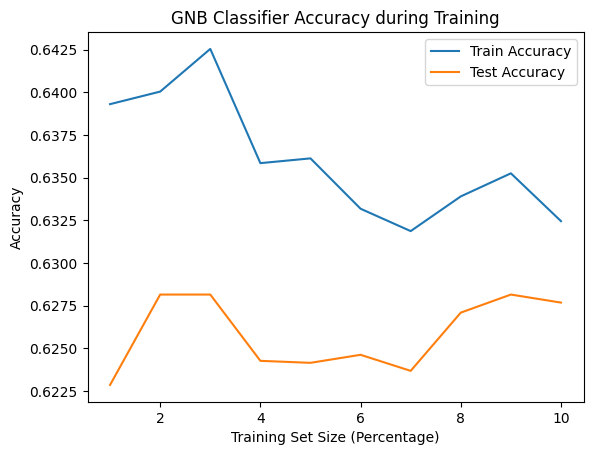

In [196]:
# Plot the accuracy graph
train_accuracy = []
test_accuracy = []

# Train the model with different training set sizes
for i in range(1, 11):
    train_size = int(len(x_train) * (i / 10))
    x_train_subset = x_train[:train_size]
    y_train_subset = y_train[:train_size]
    model_GNB.fit(x_train_subset, y_train_subset)
    y_train_pred = model_GNB.predict(x_train_subset)
    y_test_pred = model_GNB.predict(x_test)
    train_accuracy.append(accuracy_score(y_train_subset, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

plt.plot(range(1, 11), train_accuracy, label='Train Accuracy')
plt.plot(range(1, 11), test_accuracy, label='Test Accuracy')
plt.xlabel('Training Set Size (Percentage)')
plt.ylabel('Accuracy')
plt.title('GNB Classifier Accuracy during Training')
plt.legend()
plt.show()

In [197]:
cm_gnb = confusion_matrix(y_true, y_pred)

In [198]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1462
           1       0.73      0.48      0.58      1361
           2       0.51      0.74      0.60      1466
           3       0.52      0.55      0.53      1365
           4       0.55      0.56      0.56      1415
           5       0.53      0.43      0.47      1429

    accuracy                           0.63      8498
   macro avg       0.64      0.62      0.62      8498
weighted avg       0.64      0.63      0.63      8498



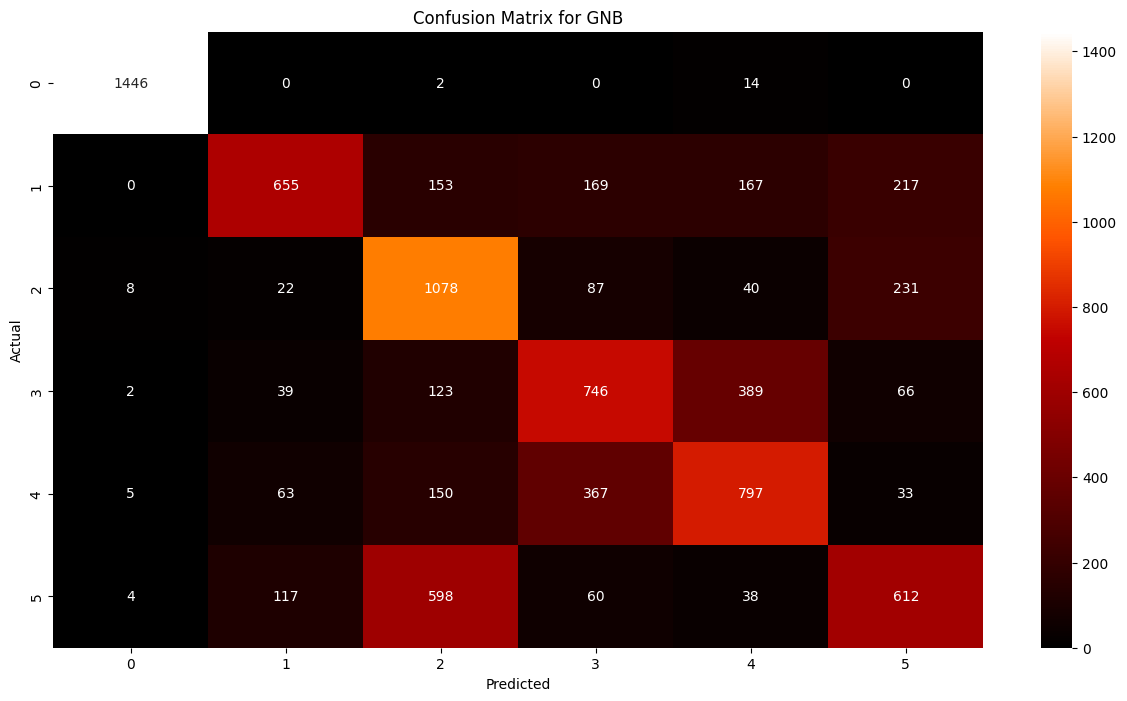

In [199]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_gnb, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GNB")
plt.show()

### Multilayer Perceptron

In [200]:
# Standardize the features (optional but recommended for neural networks)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [201]:
# Build the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

In [202]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [203]:
# Train the model
history = model.fit(x_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/50
850/850 [==============================] - 2s 2ms/step - loss: 2.9921 - accuracy: 0.3243 - val_loss: 2.6847 - val_accuracy: 0.2145
Epoch 2/50
850/850 [==============================] - 1s 2ms/step - loss: 2.6653 - accuracy: 0.1755 - val_loss: 2.5923 - val_accuracy: 0.1745
Epoch 3/50
850/850 [==============================] - 1s 2ms/step - loss: 2.6890 - accuracy: 0.1726 - val_loss: 2.7697 - val_accuracy: 0.1745
Epoch 4/50
850/850 [==============================] - 2s 3ms/step - loss: 2.7703 - accuracy: 0.1726 - val_loss: 2.7697 - val_accuracy: 0.1745
Epoch 5/50
850/850 [==============================] - 3s 3ms/step - loss: 2.7703 - accuracy: 0.1726 - val_loss: 2.7697 - val_accuracy: 0.1745
Epoch 6/50
850/850 [==============================] - 4s 5ms/step - loss: 2.7703 - accuracy: 0.1726 - val_loss: 2.7697 - val_accuracy: 0.1745
Epoch 7/50
850/850 [==============================] - 3s 4ms/step - loss: 2.7703 - accuracy: 0.1726 - val_loss: 2.7697 - val_accuracy: 0.1745
Epoch 

In [204]:
y_pred = model.predict(x_test_scaled)
# The predictions will be in the form of probabilities for each class.
# You can use argmax to get the predicted class directly:
y_pred_classes = y_pred.argmax(axis=1)

266/266 [==============================] - 0s 791us/step


In [205]:
# Calculate evaluation metrics
acc = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='macro')
prec= precision_score(y_test, y_pred_classes, average='macro')
rec = recall_score(y_test, y_pred_classes, average='macro')
mse_val = mse(y_test, y_pred_classes)
rmse_val= rmse(y_test, y_pred_classes)
mae_val = mae(y_test, y_pred_classes)
mape_val = mape(y_test, y_pred_classes)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [206]:
results_mlp = pd.DataFrame(pd.DataFrame([['Multilayer Perceptron', acc, f1, prec, rec,mse_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [207]:
results_mlp

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,Multilayer Perceptron,0.17204,0.048929,0.028673,0.166667,9.163921,3.027197,2.493881,100.0


In [208]:
results= pd.concat([results, results_mlp], ignore_index= True)

In [209]:
# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_classes)

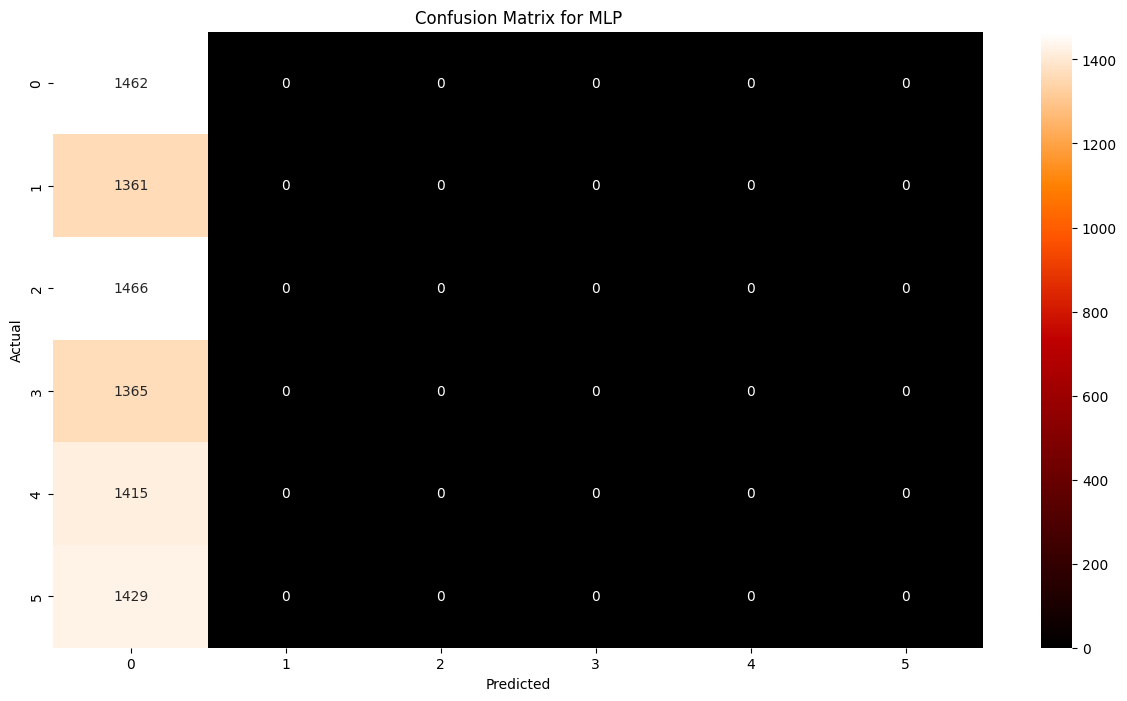

In [210]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_mlp, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for MLP")
plt.show()

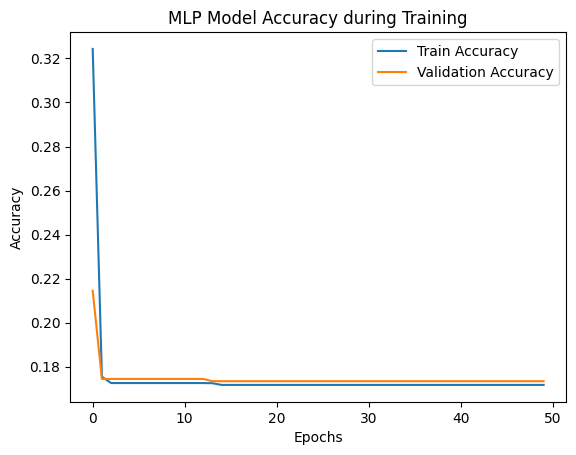

In [211]:
# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('MLP Model Accuracy during Training')
plt.legend()
plt.show()

### Logistic Regression

In [212]:
# Define the regularization strength (C) for logistic regression
C = 1.0

# Build and train the logistic regression model
model_lr = LogisticRegression(C=C, random_state=1)
model_lr.fit(x_train_scaled, y_train)

LogisticRegression(random_state=1)

In [213]:
# Make predictions
y_train_pred = model_lr.predict(x_train_scaled)
y_test_pred = model_lr.predict(x_test_scaled)
accuracy_rf = accuracy_score(y_test, y_test_pred)
print("Accuracy for RF: %.2f%%" % (accuracy_rf * 100.00))

Accuracy for RF: 27.05%


In [214]:
# Calculate evaluation metrics
acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='macro')
prec = precision_score(y_test, y_test_pred, average='macro')
rec = recall_score(y_test, y_test_pred, average='macro')
mse_val = mse(y_test, y_test_pred)
rmse_val = rmse(y_test, y_test_pred)
mae_val = mae(y_test, y_test_pred)
mape_val = mape(y_true, y_test_pred)

In [215]:
results_lr = pd.DataFrame(pd.DataFrame([['Logistic Regression', acc, f1, prec, rec,mse_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [216]:
results_lr

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,Logistic Regression,0.270534,0.244762,0.304797,0.267784,4.790657,2.188757,1.663097,69.608442


In [217]:
results= pd.concat([results, results_lr], ignore_index= True)

In [218]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_test_pred)

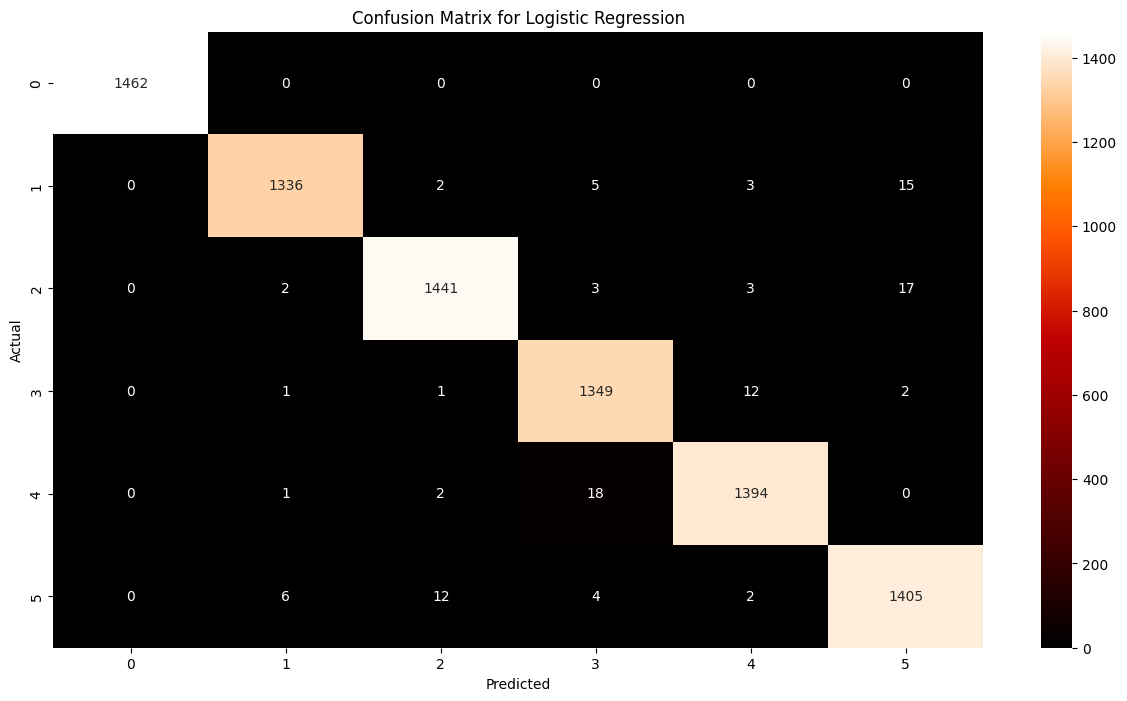

In [219]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

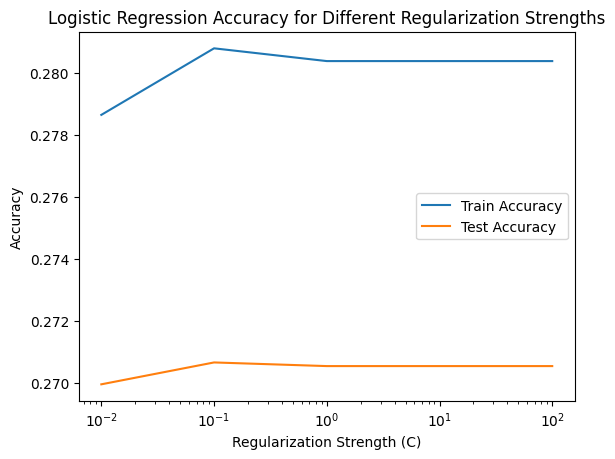

In [220]:
# Plot the accuracy graph
regularization_strengths = [0.01, 0.1, 1, 10, 100]
train_accuracy = []
test_accuracy = []

for c in regularization_strengths:
    model_lr = LogisticRegression(C=c, random_state=1)
    model_lr.fit(x_train_scaled, y_train)
    y_train_pred = model_lr.predict(x_train_scaled)
    y_test_pred = model_lr.predict(x_test_scaled)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

plt.plot(regularization_strengths, train_accuracy, label='Train Accuracy')
plt.plot(regularization_strengths, test_accuracy, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy for Different Regularization Strengths')
plt.legend()
plt.show()


### LSTM

In [224]:
model = Sequential()
model.add(LSTM(64, input_shape=(x_train.shape[1], 1)))
model.add(Dense(1, activation='linear'))

In [225]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [226]:
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
1063/1063 [==============================] - 14s 10ms/step - loss: 3.0963 - val_loss: 2.9446
Epoch 2/50
1063/1063 [==============================] - 11s 10ms/step - loss: 2.9576 - val_loss: 2.9456
Epoch 3/50
1063/1063 [==============================] - 12s 12ms/step - loss: 2.9543 - val_loss: 2.9458
Epoch 4/50
1063/1063 [==============================] - 14s 13ms/step - loss: 2.9525 - val_loss: 2.9454
Epoch 5/50
1063/1063 [==============================] - 14s 13ms/step - loss: 2.9523 - val_loss: 2.9450
Epoch 6/50
1063/1063 [==============================] - 13s 13ms/step - loss: 2.9516 - val_loss: 2.9460
Epoch 7/50
1063/1063 [==============================] - 14s 13ms/step - loss: 2.9518 - val_loss: 2.9448
Epoch 8/50
1063/1063 [==============================] - 15s 14ms/step - loss: 2.9487 - val_loss: 2.9451
Epoch 9/50
1063/1063 [==============================] - 13s 12ms/step - loss: 2.9486 - val_loss: 2.9703
Epoch 10/50
1063/1063 [==============================] - 12s 11m

In [228]:
y_pred = model.predict(x_test)

266/266 [==============================] - 2s 5ms/step


In [229]:
# Convert predicted probabilities to class labels (assuming your LSTM is for multiclass classification)
y_pred_class = np.argmax(y_pred, axis=1)  # Assuming y_pred is in one-hot encoded format
 
# Convert predicted class labels back to original categorical labels (if needed)
y_pred_labels = le.inverse_transform(y_pred_class)
 
# Flatten y_test to a 1-dimensional array using ravel()
y_test = y_test.ravel()

In [230]:
# Calculate evaluation metrics
acc = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='macro')
prec= precision_score(y_test, y_pred_classes, average='macro')
rec = recall_score(y_test, y_pred_classes, average='macro')
mse_val = mse(y_test, y_pred_classes)
rmse_val= rmse(y_test, y_pred_classes)
mae_val = mae(y_test, y_pred_classes)
mape_val = mape(y_test, y_pred_classes)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [231]:
results_lstm = pd.DataFrame(pd.DataFrame([['LSTM', acc, f1, prec, rec,mse_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [232]:
results_lstm

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,LSTM,0.17204,0.048929,0.028673,0.166667,9.163921,3.027197,2.493881,100.0


In [233]:
results= pd.concat([results, results_lstm], ignore_index= True)

In [234]:
# Confusion Matrix
cm_lstm = confusion_matrix(y_test, y_pred_classes)

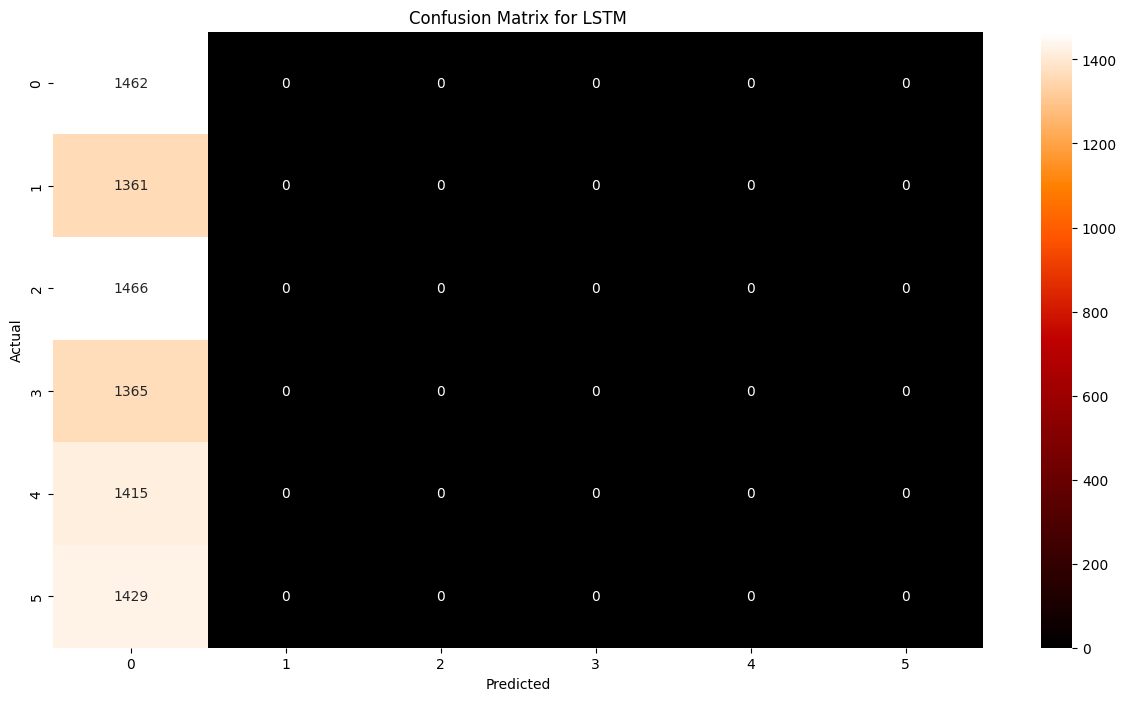

In [235]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_mlp, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LSTM")
plt.show()

266/266 [==============================] - 1s 3ms/step


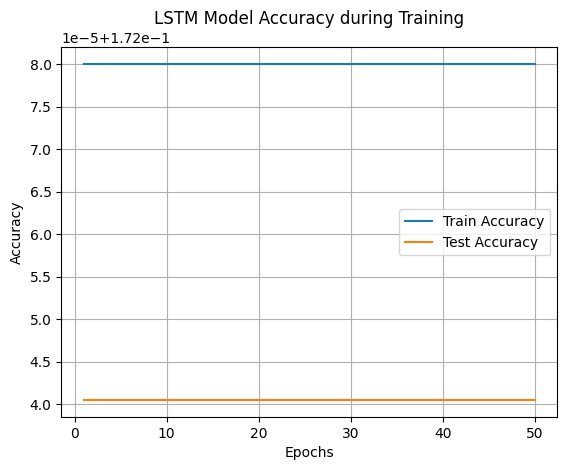

In [236]:
# Lists to store training and testing accuracies
train_accuracy_lstm = []
test_accuracy_lstm = []
 
# Training loop
epochs = 50
for epoch in range(epochs):
    # Fit the model to your training data for one epoch
    model.fit(x_train, y_train, epochs=1, batch_size=32, verbose=0)
 
    # Predict on training data
    y_train_pred = model.predict(x_train)
    y_train_pred_class = np.argmax(y_train_pred, axis=1)
 
    # Predict on testing data
    y_test_pred = model.predict(x_test)
    y_test_pred_class = np.argmax(y_test_pred, axis=1)
 
    # Calculate and store training and testing accuracies for this epoch
    train_accuracy = accuracy_score(y_train.ravel(), y_train_pred_class)
    test_accuracy = accuracy_score(y_test.ravel(), y_test_pred_class)
    train_accuracy_lstm.append(train_accuracy)
    test_accuracy_lstm.append(test_accuracy)
 
# Now you have the lists train_accuracy_lstm and test_accuracy_lstm containing the accuracies at each epoch
 
# Number of epochs
epochs = range(1, len(train_accuracy_lstm) + 1)
 
plt.plot(epochs, train_accuracy_lstm, label='Train Accuracy')
plt.plot(epochs, test_accuracy_lstm, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model Accuracy during Training')
plt.legend()
plt.grid(True)
plt.show()

### Ada Boost

In [237]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(x_train, y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [238]:
y_pred = adaboost_classifier.predict(x_test)
y_true = np.array(y_test)

In [239]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [240]:
results_ada = pd.DataFrame(pd.DataFrame([['Ada Boost', acc, f1, prec, rec,mse_val,rmse_val,mae_val,mape_val]],
columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))


In [241]:
results_ada

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,Ada Boost,0.434573,0.390634,0.494482,0.434646,3.834432,1.95817,1.323253,53.403923


In [242]:
results= pd.concat([results, results_ada], ignore_index=True)

In [243]:
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))

y_train = y_train.astype(int)
y_test = y_test.astype(int)

266/266 [==============================] - 1s 2ms/step


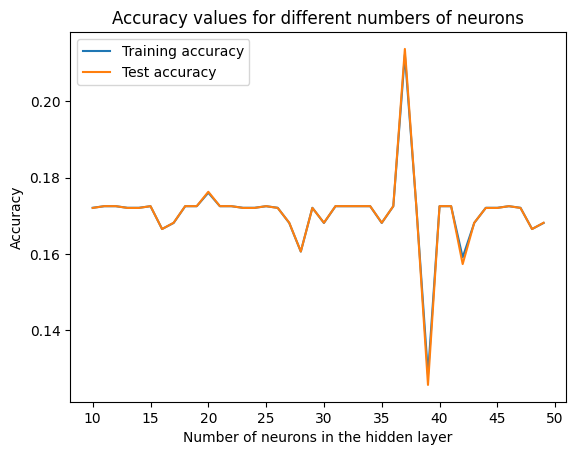

In [246]:
neuron_values = range(10,50)

# Calculate accuracy for each number of neurons on training and test sets
train_accuracies = []
test_accuracies = []

for num_neurons in neuron_values:
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_neurons, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)
    y_train_pred = np.argmax(model.predict(x_train), axis=1)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_test_pred = np.argmax(model.predict(x_test), axis=1)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

plt.plot(neuron_values, train_accuracies, label='Training accuracy')
plt.plot(neuron_values, test_accuracies, label='Test accuracy')
plt.xlabel('Number of neurons in the hidden layer')
plt.ylabel('Accuracy')
plt.title('Accuracy values for different numbers of neurons')
plt.legend()
plt.show()

In [247]:
cm_ada = confusion_matrix(y_true,y_pred)

In [248]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1462
           1       0.27      0.84      0.41      1361
           2       0.53      0.08      0.14      1466
           3       0.44      0.10      0.17      1365
           4       0.38      0.39      0.38      1415
           5       0.38      0.20      0.26      1429

    accuracy                           0.43      8498
   macro avg       0.49      0.43      0.39      8498
weighted avg       0.50      0.43      0.39      8498



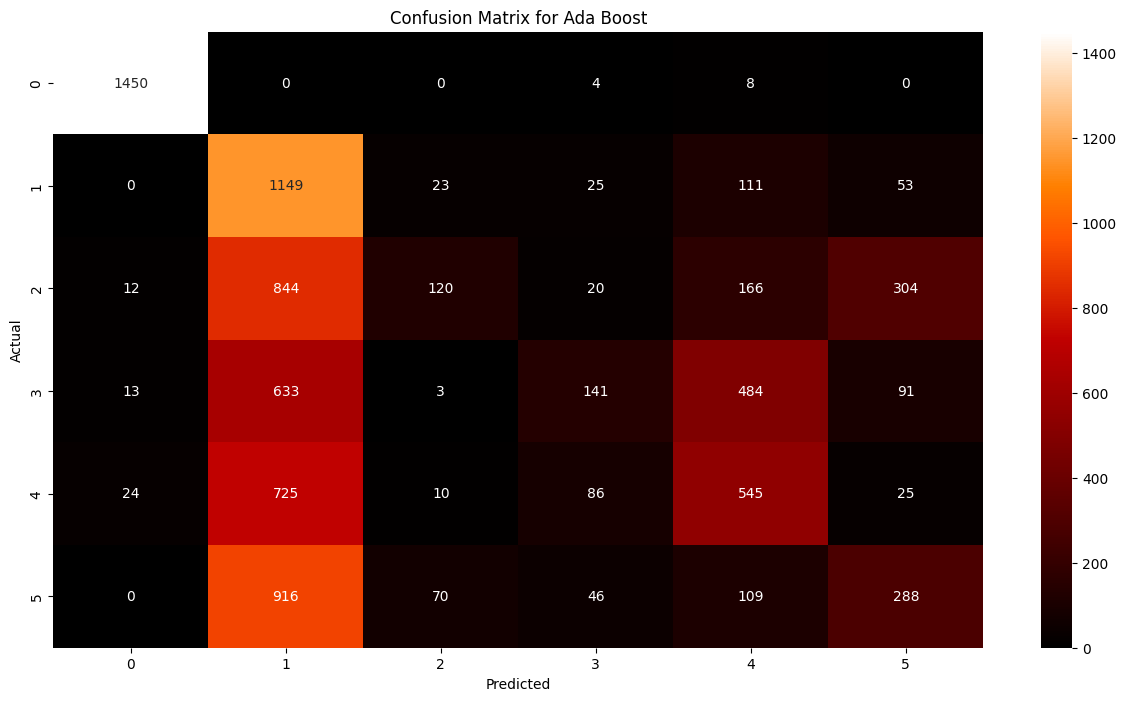

In [249]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_ada, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Ada Boost")
plt.show()

In [250]:
results

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,Random Forest,0.986114,0.986058,0.986080,0.986058,0.092728,0.304512,0.032478,1.992136
1,KNN Classifier,0.976818,0.976700,0.976866,0.976636,0.050953,0.375309,0.050953,3.305856
2,XGB Classifier,0.986938,0.986871,0.986897,0.986870,0.087197,0.295291,0.030242,1.969632
3,GNB Classifier,0.627677,0.627677,0.627677,0.627677,2.194046,1.481231,0.811367,46.431448
4,Multilayer Perceptron,0.172040,0.048929,0.028673,0.166667,9.163921,3.027197,2.493881,100.000000
5,Logistic Regression,0.270534,0.244762,0.304797,0.267784,4.790657,2.188757,1.663097,69.608442
6,LSTM,0.172040,0.048929,0.028673,0.166667,9.163921,3.027197,2.493881,100.000000
7,Ada Boost,0.434573,0.390634,0.494482,0.434646,3.834432,1.958170,1.323253,53.403923
